In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
data=pd.read_csv("F:/AirQualityUCI.csv",sep=";") #read data
data

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3/23/2005,04:00:00,-200.0,993,-200,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919,Very low
9353,3/26/2005,04:00:00,-200.0,1122,-200,6.0,811,181,641,92,1336,1122,16.2,71.2,1.3013,Very low
9354,3/29/2005,04:00:00,-200.0,883,-200,1.3,530,63,997,46,1102,617,13.7,68.2,1.0611,Very low
9355,04/01/2005,04:00:00,-200.0,818,-200,0.8,473,47,1257,41,898,323,13.7,48.8,0.7606,Very low


In [3]:
data.replace(to_replace=-200, value= np.NaN, inplace= True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
Date            9357 non-null object
Time            9357 non-null object
CO_GT           7674 non-null float64
PT08_S1_CO      8991 non-null float64
NMHC_GT         914 non-null float64
C6H6_GT         8991 non-null float64
PT08_S2_NMHC    8991 non-null float64
Nox_GT          7718 non-null float64
PT08_S3_Nox     8991 non-null float64
NO2_GT          7715 non-null float64
PT08_S4_NO2     8991 non-null float64
PT08_S5_O3      8991 non-null float64
T               8991 non-null float64
RH              8991 non-null float64
AH              8991 non-null float64
CO_level        9357 non-null object
dtypes: float64(13), object(3)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

Date               0
Time               0
CO_GT           1683
PT08_S1_CO       366
NMHC_GT         8443
C6H6_GT          366
PT08_S2_NMHC     366
Nox_GT          1639
PT08_S3_Nox      366
NO2_GT          1642
PT08_S4_NO2      366
PT08_S5_O3       366
T                366
RH               366
AH               366
CO_level           0
dtype: int64

In [6]:
data['DateTime'] = data['Date']+ ' ' + data['Time']

In [7]:
data.drop(['Time'], axis=1, inplace=True)

In [8]:
data['DateTime'] = pd.to_datetime(data['DateTime'].astype(str), format='%m/%d/%Y %H:%M:%S')

In [9]:
data['Date'] = pd.to_datetime(data['Date'].astype(str), format='%m/%d/%Y')

In [10]:
from datetime import date

In [11]:
data['Year'] = data['DateTime'].map(lambda x:x.year)

In [12]:
data['YearMonth'] = pd.to_datetime(data.DateTime).dt.to_period('m') #mengubah dalam bentuk bulan dan tahun agar lebih mudah divisualisasi

terlalu banyak missing value pada variabel NMHC sehingga didrop

In [13]:
data.drop(['NMHC_GT'], axis= 1, inplace= True)

In [14]:
data["CO_GT"] = data.groupby("Date")["CO_GT"].transform(lambda x: x.fillna(x.median()))
data["PT08_S1_CO"] = data.groupby("Date")["PT08_S1_CO"].transform(lambda x: x.fillna(x.median()))
data["C6H6_GT"] = data.groupby("Date")["C6H6_GT"].transform(lambda x: x.fillna(x.median()))
data["PT08_S2_NMHC"] = data.groupby("Date")["PT08_S2_NMHC"].transform(lambda x: x.fillna(x.median()))
data["Nox_GT"] = data.groupby("Date")["CO_GT"].transform(lambda x: x.fillna(x.median()))
data["PT08_S3_Nox"] = data.groupby("Date")["PT08_S3_Nox"].transform(lambda x: x.fillna(x.median()))
data["NO2_GT"] = data.groupby("Date")["NO2_GT"].transform(lambda x: x.fillna(x.median()))
data["PT08_S4_NO2"] = data.groupby("Date")["PT08_S4_NO2"].transform(lambda x: x.fillna(x.median()))
data["PT08_S5_O3"] = data.groupby("Date")["PT08_S5_O3"].transform(lambda x: x.fillna(x.median()))
data["T"] = data.groupby("Date")["T"].transform(lambda x: x.fillna(x.median()))
data["RH"] = data.groupby("Date")["RH"].transform(lambda x: x.fillna(x.median()))
data["AH"] = data.groupby("Date")["AH"].transform(lambda x: x.fillna(x.median()))

In [15]:
data.fillna(method='ffill', inplace= True)

In [16]:
data.isnull().sum()

Date            0
CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
DateTime        0
Year            0
YearMonth       0
dtype: int64

In [17]:
data

,Date,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level,DateTime,Year,YearMonth
0,2004-11-23,11.90,2008.0,50.6,1980.0,11.90,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741,Very High,2004-11-23 19:00:00,2004,2004-11
1,2004-11-23,11.50,1918.0,49.4,1958.0,11.50,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324,Very High,2004-11-23 20:00:00,2004,2004-11
2,2004-11-17,10.20,1802.0,47.7,1924.0,10.20,356.0,192.0,2235.0,2452.0,13.7,52.8,0.8244,Very High,2004-11-17 18:00:00,2004,2004-11
3,2004-11-23,10.20,1982.0,49.5,1959.0,10.20,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936,Very High,2004-11-23 18:00:00,2004,2004-11
4,2004-11-26,10.10,1956.0,45.2,1877.0,10.10,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979,Very High,2004-11-26 18:00:00,2004,2004-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-03-23,2.40,993.0,2.3,604.0,2.40,848.0,65.0,1160.0,762.0,14.5,66.4,1.0919,Very low,2005-03-23 04:00:00,2005,2005-03
9353,2005-03-26,1.90,1122.0,6.0,811.0,1.90,641.0,92.0,1336.0,1122.0,16.2,71.2,1.3013,Very low,2005-03-26 04:00:00,2005,2005-03
9354,2005-03-29,2.40,883.0,1.3,530.0,2.40,997.0,46.0,1102.0,617.0,13.7,68.2,1.0611,Very low,2005-03-29 04:00:00,2005,2005-03
9355,2005-04-01,1.10,818.0,0.8,473.0,1.10,1257.0,41.0,898.0,323.0,13.7,48.8,0.7606,Very low,2005-04-01 04:00:00,2005,2005-04


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
Date            9357 non-null datetime64[ns]
CO_GT           9357 non-null float64
PT08_S1_CO      9357 non-null float64
C6H6_GT         9357 non-null float64
PT08_S2_NMHC    9357 non-null float64
Nox_GT          9357 non-null float64
PT08_S3_Nox     9357 non-null float64
NO2_GT          9357 non-null float64
PT08_S4_NO2     9357 non-null float64
PT08_S5_O3      9357 non-null float64
T               9357 non-null float64
RH              9357 non-null float64
AH              9357 non-null float64
CO_level        9357 non-null object
DateTime        9357 non-null datetime64[ns]
Year            9357 non-null int64
YearMonth       9357 non-null period[M]
dtypes: datetime64[ns](2), float64(12), int64(1), object(1), period[M](1)
memory usage: 1.2+ MB


# summary statistics

In [19]:
data.describe()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,Year
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.074880,1101.330181,10.094993,940.004489,2.074880,833.803356,109.589291,1451.813509,1028.944213,18.171374,49.306765,1.019338,2004.240141
std,1.389619,216.892854,7.417543,265.612688,1.389619,254.546535,46.173740,345.064921,401.305677,8.838006,17.255615,0.404268,0.427192
min,0.100000,647.000000,0.100000,383.000000,0.100000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,2004.000000
25%,1.100000,938.000000,4.500000,735.000000,1.100000,658.000000,75.000000,1224.000000,735.000000,11.600000,36.100000,0.726200,2004.000000
50%,1.700000,1066.000000,8.300000,911.000000,1.700000,807.000000,104.000000,1458.000000,968.000000,17.600000,49.500000,0.988900,2004.000000
75%,2.800000,1235.000000,14.000000,1116.000000,2.800000,967.000000,135.000000,1665.000000,1281.000000,24.300000,62.500000,1.305700,2004.000000
max,11.900000,2040.000000,63.700000,2214.000000,11.900000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005.000000


In [20]:
data1=data.drop(["Date","DateTime","Year","YearMonth","CO_level"],axis=1)
data1 #mengambil data numerik saja untuk PCA dan Cluster

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,11.90,2008.0,50.6,1980.0,11.90,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741
1,11.50,1918.0,49.4,1958.0,11.50,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324
2,10.20,1802.0,47.7,1924.0,10.20,356.0,192.0,2235.0,2452.0,13.7,52.8,0.8244
3,10.20,1982.0,49.5,1959.0,10.20,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936
4,10.10,1956.0,45.2,1877.0,10.10,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2.40,993.0,2.3,604.0,2.40,848.0,65.0,1160.0,762.0,14.5,66.4,1.0919
9353,1.90,1122.0,6.0,811.0,1.90,641.0,92.0,1336.0,1122.0,16.2,71.2,1.3013
9354,2.40,883.0,1.3,530.0,2.40,997.0,46.0,1102.0,617.0,13.7,68.2,1.0611
9355,1.10,818.0,0.8,473.0,1.10,1257.0,41.0,898.0,323.0,13.7,48.8,0.7606


In [21]:
from scipy import stats #outlier
z=np.abs(stats.zscore(data1._get_numeric_data()))
print(z)

[[7.07074693 4.18048937 5.46099574 ... 0.65305257 1.47167121 0.13546757]
 [6.78288289 3.76551577 5.29920846 ... 0.75489093 1.55860408 0.03231276]
 [5.84732477 3.2306609  5.07000982 ... 0.50595271 0.2024513  0.48222445]
 ...
 [0.23397606 1.00668069 1.185765   ... 0.50595271 1.0949621  0.103309  ]
 [0.70158206 1.30638385 1.25317637 ... 0.50595271 0.02936969 0.64004884]
 [0.05406103 1.09428623 1.25317637 ... 0.72094481 0.38790809 0.60615865]]


In [22]:
outlier=data1[(z<3).all(axis=1)]
print(outlier.shape) #jumlah data tidak outlier

(8991, 12)


In [23]:
c=pd.DataFrame([])
c["Keterangan:"]=["tidak ada outlier","outlier"]
c["jumlah observasi"]=[8991,9357-8991]
c

,Keterangan:,jumlah observasi
0,tidak ada outlier,8991
1,outlier,366


In [24]:
data2=data.sort_values(by=['Date']) #agar lebih mudah visualisasi

# Visualisasi data

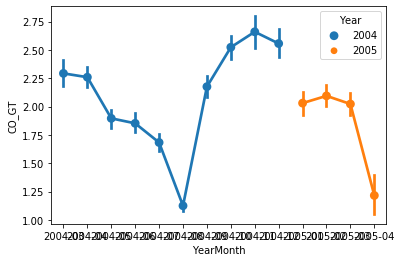

In [25]:
sns.pointplot(x="YearMonth",y="CO_GT",hue="Year",data=data2)

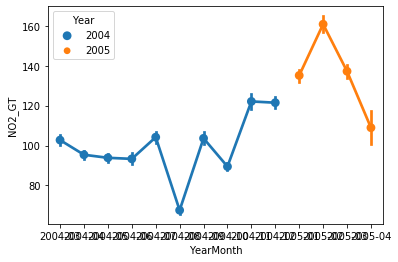

In [26]:
sns.pointplot(x="YearMonth",y="NO2_GT",hue="Year",data=data2)

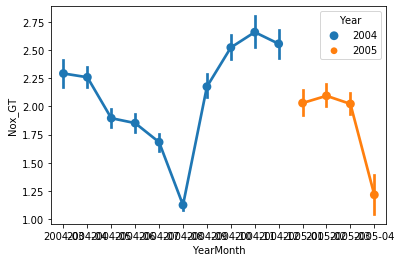

In [27]:
sns.pointplot(x="YearMonth",y="Nox_GT",hue="Year",data=data2)

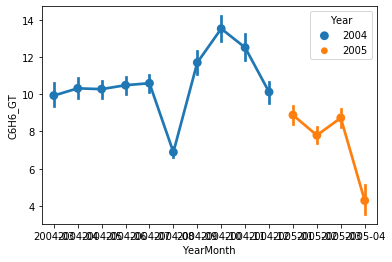

In [28]:
sns.pointplot(x="YearMonth",y="C6H6_GT",hue="Year",data=data2)

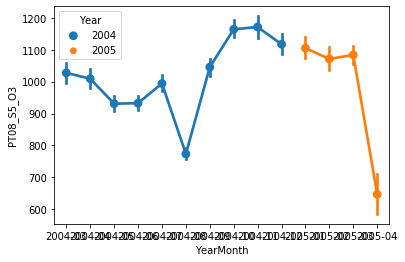

In [29]:
sns.pointplot(x="YearMonth",y="PT08_S5_O3",hue="Year",data=data2)

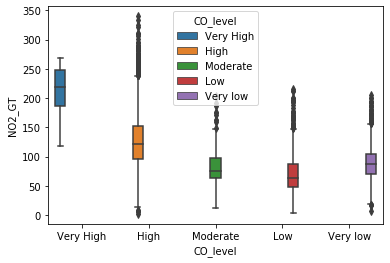

In [30]:
sns.boxplot(y ='NO2_GT',x='CO_level',hue= 'CO_level',data=data)

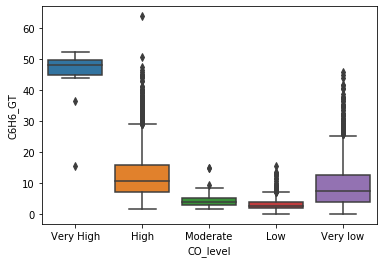

In [31]:
sns.boxplot(y="C6H6_GT",x='CO_level',data=data)

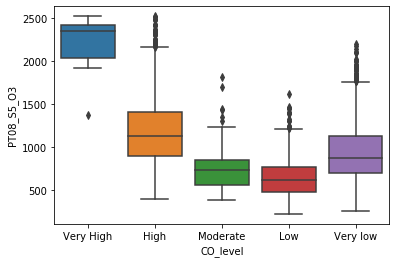

In [32]:
sns.boxplot(y="PT08_S5_O3",x='CO_level',data=data)

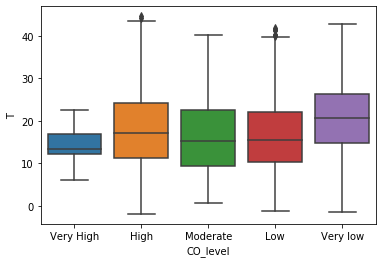

In [33]:
sns.boxplot(y="T",x='CO_level',data=data)

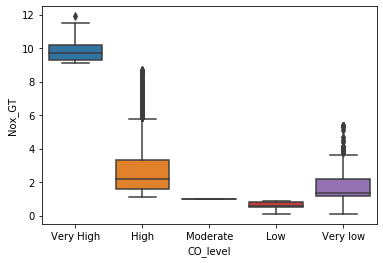

In [34]:
sns.boxplot(y="Nox_GT",x='CO_level',data=data)

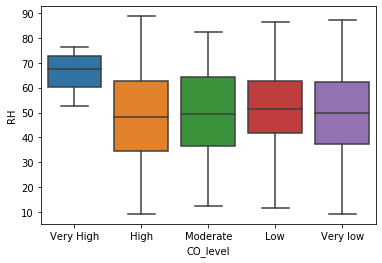

In [35]:
sns.boxplot(y="RH",x='CO_level',data=data)

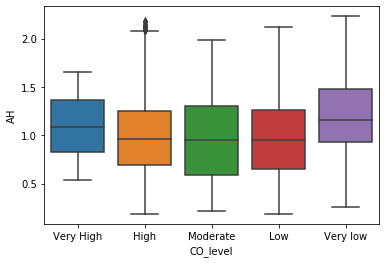

In [36]:
sns.boxplot(y="AH",x='CO_level',data=data)

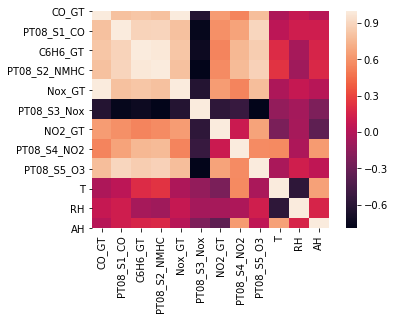

In [37]:
korelasi=data1.corr()
sns.heatmap(korelasi,square=True)

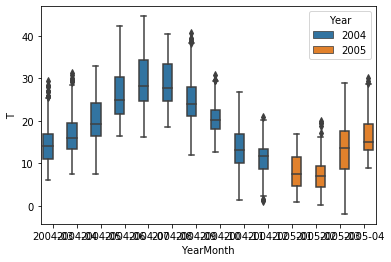

In [38]:
sns.boxplot(x="YearMonth",y="T",hue="Year",data=data2)

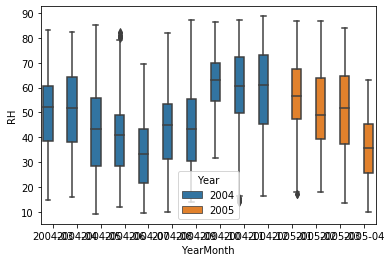

In [39]:
sns.boxplot(x="YearMonth",y="RH",hue="Year",data=data2)

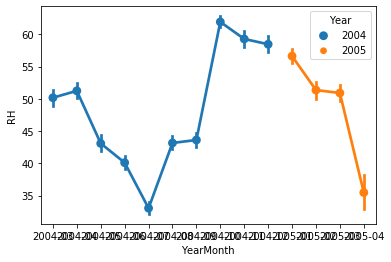

In [69]:
sns.pointplot(x="YearMonth",y="RH",hue="Year",data=data2)

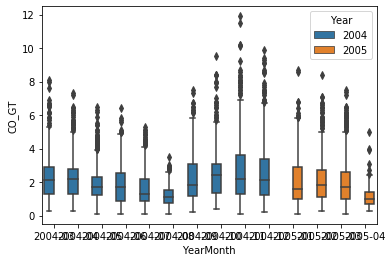

In [41]:
sns.boxplot(x="YearMonth",y="CO_GT",hue="Year",data=data2)

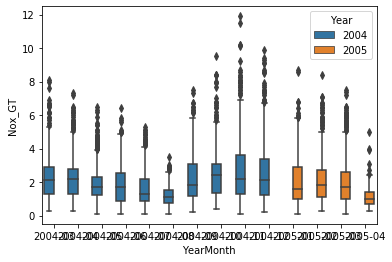

In [42]:
sns.boxplot(x="YearMonth",y="Nox_GT",hue="Year",data=data2)

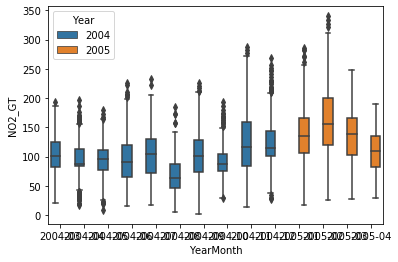

In [43]:
sns.boxplot(x="YearMonth",y="NO2_GT",hue="Year",data=data2)

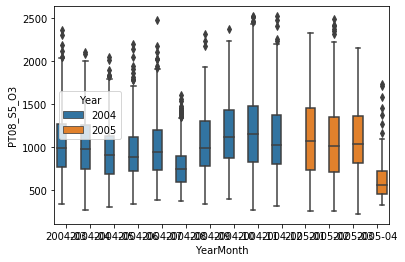

In [44]:
sns.boxplot(x="YearMonth",y="PT08_S5_O3",hue="Year",data=data2)

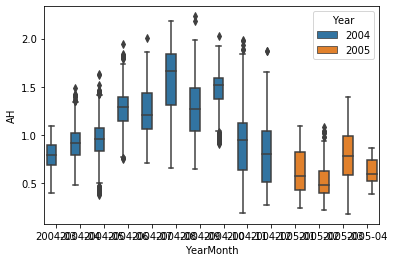

In [45]:
sns.boxplot(x="YearMonth",y="AH",hue="Year",data=data2)

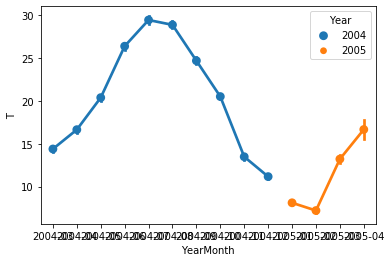

In [67]:
sns.pointplot(x="YearMonth",y="T",hue="Year",data=data2)

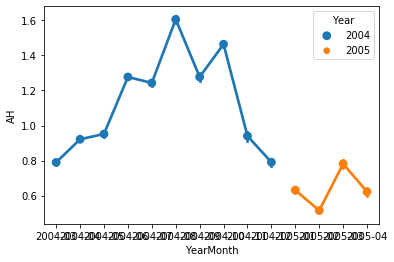

In [68]:
sns.pointplot(x="YearMonth",y="AH",hue="Year",data=data2)

# Clustering

In [46]:
x=data1.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]].values

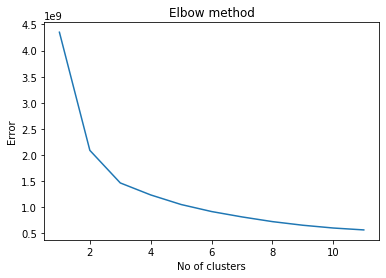

In [47]:
Error =[]
for i in range(1,12):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,12), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [48]:
kmeans3=KMeans(n_clusters=3)
y_kmeans3= kmeans3.fit_predict(x)
print(y_kmeans3)

centroids=kmeans3.cluster_centers_
centroids=np.array(centroids)

[2 2 2 ... 1 1 1]


<function matplotlib.pyplot.show(*args, **kw)>

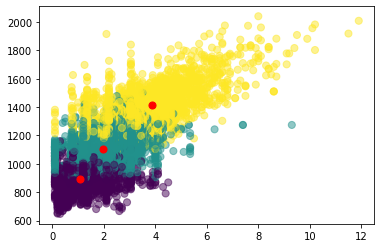

In [49]:
kmeans=KMeans(n_clusters=3).fit(data1)
data1['Cluster'] = KMeans(n_clusters=3).fit(data1).labels_
centroids=kmeans.cluster_centers_
centroids=np.array(centroids)
plt.scatter(x[:,0],x[:,1],c=kmeans.labels_.astype(float),s=50,alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],c='red',s=50)
plt.show

In [50]:
centroids

array([[1.08257673e+00, 8.96191336e+02, 3.54884910e+00, 6.73497922e+02,
        1.08257673e+00, 1.08725480e+03, 8.28636509e+01, 1.16545061e+03,
        6.47870045e+02, 1.52751758e+01, 4.94981618e+01, 8.76291864e-01],
       [1.94958254e+00, 1.10302242e+03, 9.68741651e+00, 9.57488192e+02,
        1.94958254e+00, 7.75832777e+02, 1.10582538e+02, 1.48149034e+03,
        1.03399702e+03, 1.99676050e+01, 4.79607944e+01, 1.07913322e+00],
       [3.85650466e+00, 1.41285714e+03, 2.09859597e+01, 1.31326951e+03,
        3.85650466e+00, 5.63904762e+02, 1.48584929e+02, 1.83047717e+03,
        1.60372018e+03, 1.89222386e+01, 5.17827688e+01, 1.11594266e+00]])

In [51]:
dist=kmeans.fit_transform(data1)
data4=DataFrame(dist,columns=['Distance ke C1','Distance ke C2','Distance ke C3'])
print(data4)

      Distance ke C1  Distance ke C2  Distance ke C3
0        2229.356626     1395.170754     2894.076528
1        2077.345422     1244.584083     2743.864388
2        2047.927595     1207.067200     2709.385266
3        2224.108518     1385.823053     2889.548694
4        2137.652126     1294.229902     2799.507796
...              ...             ...             ...
9352      565.536907     1386.268355      293.148132
9353      263.663981      905.969510      725.346571
9354      774.279051     1610.188365      188.444378
9355     1180.555978     2014.007003      502.296175
9356      987.211201     1820.419138      330.373111

[9357 rows x 3 columns]


# Menentukan masuk cluster mana

In [52]:
result=data1.join(data4)
result

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,Cluster,Distance ke C1,Distance ke C2,Distance ke C3
0,11.90,2008.0,50.6,1980.0,11.90,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741,2,2229.356626,1395.170754,2894.076528
1,11.50,1918.0,49.4,1958.0,11.50,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324,2,2077.345422,1244.584083,2743.864388
2,10.20,1802.0,47.7,1924.0,10.20,356.0,192.0,2235.0,2452.0,13.7,52.8,0.8244,2,2047.927595,1207.067200,2709.385266
3,10.20,1982.0,49.5,1959.0,10.20,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936,2,2224.108518,1385.823053,2889.548694
4,10.10,1956.0,45.2,1877.0,10.10,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979,2,2137.652126,1294.229902,2799.507796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2.40,993.0,2.3,604.0,2.40,848.0,65.0,1160.0,762.0,14.5,66.4,1.0919,0,565.536907,1386.268355,293.148132
9353,1.90,1122.0,6.0,811.0,1.90,641.0,92.0,1336.0,1122.0,16.2,71.2,1.3013,1,263.663981,905.969510,725.346571
9354,2.40,883.0,1.3,530.0,2.40,997.0,46.0,1102.0,617.0,13.7,68.2,1.0611,0,774.279051,1610.188365,188.444378
9355,1.10,818.0,0.8,473.0,1.10,1257.0,41.0,898.0,323.0,13.7,48.8,0.7606,0,1180.555978,2014.007003,502.296175


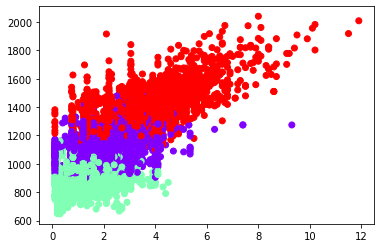

In [53]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans3,cmap='rainbow')

# Principal Component Analysis

In [46]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(data1)

In [47]:
cor_mat1=np.corrcoef(X_std.T) #digunakan matriks korelasi
eig_vals,eig_vecs=np.linalg.eig(cor_mat1)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.41386052e-01  1.22234372e-01 -6.54299055e-03 -4.58782040e-01
   3.20770888e-01  2.23287902e-01  4.59418317e-02 -9.70610754e-03
   7.07106781e-01 -5.41984734e-02  9.68428633e-03 -1.72640883e-03]
 [-3.57823809e-01  4.14542061e-02  7.62867167e-02  7.98074318e-02
  -2.52772183e-01 -1.08202585e-01  5.49571880e-01 -6.22905419e-01
   3.63715499e-15  2.99088716e-01  1.43397100e-02  5.24700452e-02]
 [-3.63969000e-01 -5.22611364e-02 -5.56942927e-02 -8.94010824e-02
  -3.12979919e-01 -3.55265235e-02 -3.86408385e-01  1.96518267e-01
  -8.17681001e-15  4.70498995e-01 -5.85098324e-01  5.33117997e-02]
 [-3.68198805e-01 -6.84596609e-02 -7.66870871e-02  3.34324420e-02
  -2.62512887e-01  3.49998097e-03 -3.30858045e-01  1.16455607e-01
   1.07359421e-14  1.93773185e-01  7.79757294e-01 -1.23371690e-01]
 [-3.41386052e-01  1.22234372e-01 -6.54299055e-03 -4.58782040e-01
   3.20770888e-01  2.23287902e-01  4.59418317e-02 -9.70610754e-03
  -7.07106781e-01 -5.41984734e-02  9.68428633e-03 -1.72640

In [48]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
6.875569731625943
2.3642302049751986
1.3237105095304353
0.5458662440092289
0.3679512285037035
0.20302481073070724
0.1178539896201221
0.09677249222315815
0.05915579718447464
0.03589646779965218
0.009968523797375065
5.505488758061239e-16


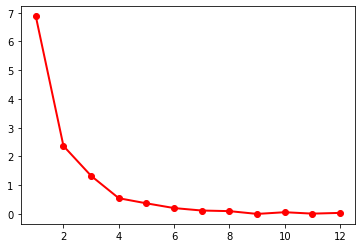

In [51]:
num_vars=12
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals,eig_vals, 'ro-', linewidth=2)

In [52]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 57.29641443,  76.99833281,  88.02925372,  92.57813908,
        95.64439932,  97.33627274,  98.31838932,  99.12482676,
        99.61779174,  99.91692897, 100.        , 100.        ])

In [53]:
from sklearn.decomposition import PCA
model=PCA(n_components=3)
model.fit(data1)
x_red=model.transform(data1)
x_red

array([[ 2235.68855789,  -184.3888695 ,   238.70138979],
       [ 2088.43954719,  -172.37451942,   189.05618781],
       [ 2053.53899599,   118.25615927,   285.0534923 ],
       ...,
       [ -717.57619742,    65.62795722,   -61.66641377],
       [-1129.14737598,    40.45178035,    29.14745088],
       [ -931.79620901,   102.11604245,   -16.12057903]])

In [54]:
model.explained_variance_

array([370370.59685947,  62599.77048119,  18766.66826537])

In [55]:
model.explained_variance_ratio_

array([0.79637684, 0.13460304, 0.04035239])

In [56]:
np.transpose(model.components_)

array([[ 1.81753629e-03,  6.91874431e-04,  1.41936671e-03],
       [ 3.34033648e-01,  8.42545725e-02,  1.24538751e-01],
       [ 1.14525159e-02, -1.79559864e-03,  3.69041726e-03],
       [ 4.20041189e-01, -4.98405651e-02, -1.86850843e-02],
       [ 1.81753629e-03,  6.91874431e-04,  1.41936671e-03],
       [-3.54319429e-01, -2.28735413e-01,  8.87957120e-01],
       [ 4.25580449e-02,  9.90518682e-02,  5.25623080e-03],
       [ 4.46081363e-01, -8.46510255e-01,  1.44221656e-02],
       [ 6.20884121e-01,  4.59362086e-01,  4.41616629e-01],
       [ 2.76606010e-03, -2.39010159e-02, -1.64326699e-02],
       [ 1.53445952e-03,  1.07800595e-02,  1.11349775e-02],
       [ 1.72961952e-04, -1.06581680e-03, -7.59633651e-04]])

In [57]:
pca=PCA()  
pca.n_components=3
pca_data=pca.fit_transform(data1)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)

In [58]:
a=pd.DataFrame(np.transpose(model.components_))
a.columns=['PC1','PC2','PC3']
a

,PC1,PC2,PC3
0,0.001818,0.000692,0.001419
1,0.334034,0.084255,0.124539
2,0.011453,-0.001796,0.003690
3,0.420041,-0.049841,-0.018685
4,0.001818,0.000692,0.001419
5,-0.354319,-0.228735,0.887957
6,0.042558,0.099052,0.005256
7,0.446081,-0.846510,0.014422
8,0.620884,0.459362,0.441617
9,0.002766,-0.023901,-0.016433


In [59]:
cum_var_explained

array([0.79637684, 0.93097988, 0.97133227])

In [60]:
percentage_var_explained

array([0.79637684, 0.13460304, 0.04035239])

In [61]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})

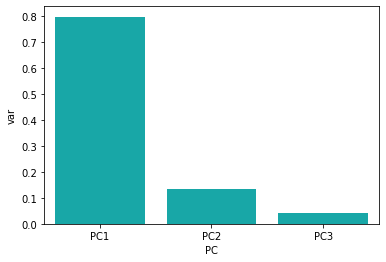

In [62]:
sns.barplot(x='PC',y="var",data=df, color="c");

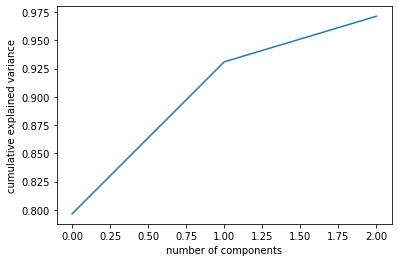

In [66]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()